# Tensorflow tutorial/my first try

#### example used: predicting video game prices
 
### Author: Samyakh Tukra 2018

In [1]:
# tensors are the central unit of data....i.e.:
[1,2,3]

[1, 2, 3]

In [3]:
[[1,2,3],[4,5,6]]

[[1, 2, 3], [4, 5, 6]]

In [1]:
import tensorflow as tf
import os
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

A computational graph is a series of TensorFlow operations arranged into a 
graph of nodes. So there are different types of nodes we can have, constant,
placeholder and etc. (constants are useless since they hold a single value)
Placeholder can actually hold multiple inputs (actually used for tensors).

#### Placeholder nodes can get assigned a new value every time we make a calculation (hence they self update!)


start a simple computation graph, which adds 2 inputs x and y together... once
this graph is defined, we can use it by creating a:
#### Tensorflow Session (<<< this is crucial for running anything in tensorflow....
#### after computing the computational graph always define a session to use it!

#### Hence, treat everything as a node! that will be connected, To actually evaluate the nodes, we must run the computational graph within a session. A session encapsulates the control and state of the TensorFlow runtime.




In [2]:
# define the inputs
X= tf.placeholder(tf.float32, name="X") 
# there are 2 inputs, the data type and
# the name of the node (so that in the computational graph I can identify it)
# I select 32 floating point as my data type... so that I can put it in later
'''remember when defining a node you have to choose what kind
of node to create, for this I will use it as a placeholder node'''
# similarly

Y=tf.placeholder(tf.float32, name="Y")

# define the node that does the addition function:
addition= tf.add(X,Y) # linking the X and Y nodes in the computational graph!




### So above I created my first computation graph! now to use it I must create a session as done below:

In [3]:
# to create a session simply follow the next line:

with tf.Session() as session:
    result = session.run(addition, feed_dict={X:[1,2,3],Y:[4,5,6]}) 
    '''this is where we use the session we want to run
    which is addition. (remember once defining a session you must run it!) 
    then I also need to input values for x and y that we are going to add, this
    is done in the form of a dictionary, using an inbuilt tensorflow function:
    feed_dict where X value = 1 and Y = 4'''
    
    print(result)
    
    

[5. 7. 9.]


In [4]:
result

array([5., 7., 9.], dtype=float32)

### It seems tedious to do so much computation to simply add 2 numbers.... create a session and wait for the engine to compute the graph well..... tensorflow shines for large data (so it will be useful for DL)

there are different ways of loading data:
1. Preload data into memory (and pass it into tensorflow as a single array - plain python code).... this is quick and easy but it only works if your entire dataset firts into the RAM. (you can use Python libraries like pandas to help)
2. feed data step-by step: you need to write code to load data in batches.
3. Set up a custom data pipeline (the best option if you have large data): data pipeline only loads data into memory in small chunks! you can use tensorflow specific library code to get this done. Advantage: paralell processing across multiple cpus


For now we will only use small data set so we preload it into memory!

In [6]:
# first let's load our training data:
training_data_df = pd.read_csv("D:\\Ex_Files_TensorFlow\\Ex_Files_TensorFlow\\Exercise Files\\03\\sales_data_training.csv",dtype=float)

# split the training data into 2: columns for X (data to train with) and Y (values to predict) i.e. the money we want to predict
X_training= training_data_df.drop('total_earnings', axis=1).values 
# all the columns except for the last one (unit price)... hence use drop function to drop the last column
# axis = 1 tells it we want to drop a column not a row.
# the .values is used to get the results as an array
Y_training= training_data_df[['total_earnings']].values # this is a column we use

# Now do the same for testing data:
testing_data_df= pd.read_csv("D:\\Ex_Files_TensorFlow\\Ex_Files_TensorFlow\\Exercise Files\\03\\sales_data_test.csv",dtype= float)

X_testing= testing_data_df.drop('total_earnings',axis=1).values
Y_testing= testing_data_df[['total_earnings']].values

'''Now we need to pre-process our data. In order to train the neural network, 
we want to scale all the numbers in each column of our data set to be between 
the value of 0 and 1. If the numbers in one column are large but the numbers 
in another column are small, the neural network training won't work very well.
One way we can do this is to use the MinMaxScaler object from the popular 
scikit-learn library'''

# Scale the data from range of 0 to 1
X_scaler=MinMaxScaler(feature_range=(0,1)) # feature_range is the parameter function that scales our data from (min,max)
Y_scaler=MinMaxScaler(feature_range=(0,1))

# Now we can scale the data, for this we use the fit_transform function and pass in our data:
''' Fit_transform means we want it to first fit to our data, or figure out how much to scale
down the numbers in each column, and then we want it to actually transform, 
or scale the data.'''
X_scaled_training = X_scaler.fit_transform(X_training)
Y_scaled_training = Y_scaler.fit_transform(Y_training)

# do the same for the testing (this has to be transformed by the same amount as
# training data):

# therefore we simply use: transform instead of fit_transform:
X_scaled_testing= X_scaler.transform(X_testing)
Y_scaled_testing= Y_scaler.transform(Y_testing)

print(X_scaled_testing.shape)
print(Y_scaled_testing.shape)

(400, 9)
(400, 1)


## Now let's build a simple (Feed Forward) Neural Network in Tensorflow

The training dataset has 9 input features i.e. (9 columns used for testing) hence I will need 9 input nodes in the network which I will model using a placeholder X that will hold 9 values.

Then I will have 3 layers in the network that will train to find a relationship between the inputs and outputs. (for now I will only use fully connected layers... i.e. every node in each layer is connected to every node in the following layer)

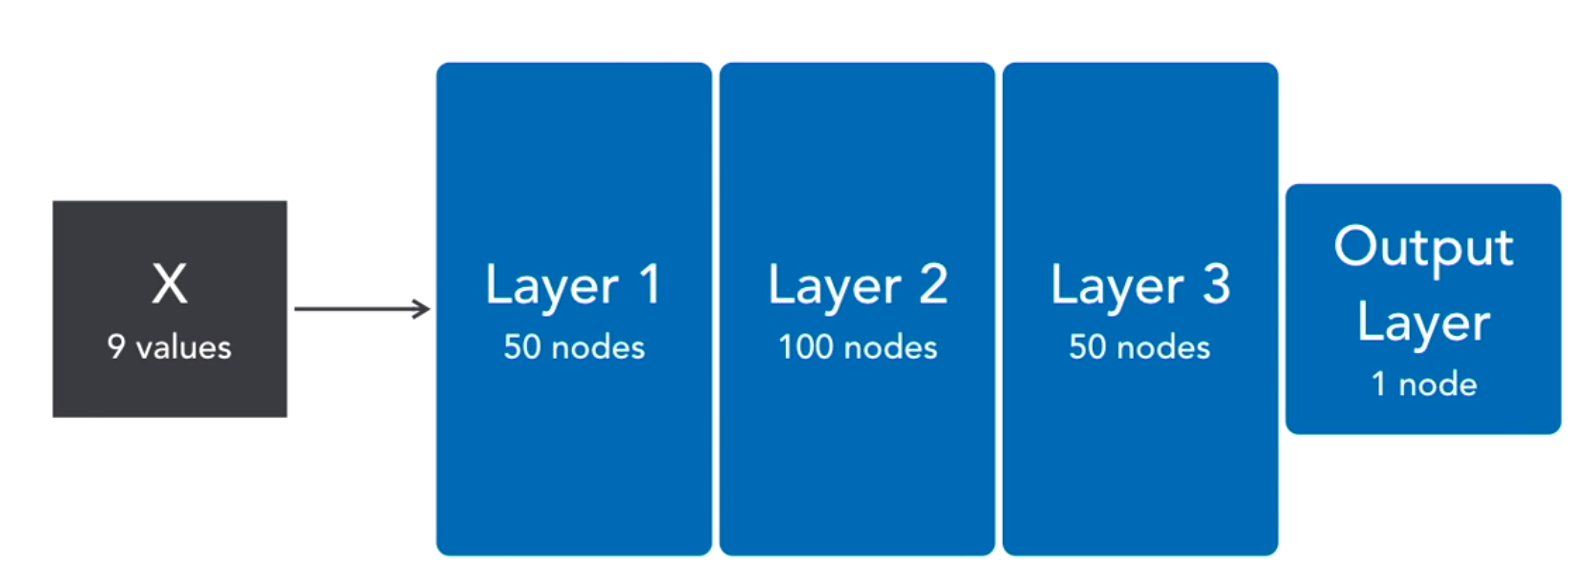

I'll try different layer sizes later..... since I am only trying to predice a single value (i.e. price of a video game) I'll need only one output node in the output layer.

In [ ]:
# Define the training parameters
learning_rate = 0.001 # the number of steps
training_epochs = 100 # the no of iterations I will train for
display_step = 5

# Define how many inputs and outputs are in our neural network
number_of_inputs = 9 # input nodes
number_of_outputs = 1 # output node.

# Define how many neurons/nodes we want in each layer of our neural network
layer_1_nodes = 50
layer_2_nodes = 100
layer_3_nodes = 50

# Section One: Define the layers of the neural network itself

# Input Layer
'''in python to keep things organised we put things in functions/classes, in tf we can define a variable
scope which almost acts the same way! by using the tf.variablescope function. Any variables created within
the scope will be automatically given a prefix related to their name internally i.e. variables in the 
input variable scope will only relate to input! kinda like defining a local variable. Plus since TF makes
a computational graph it makes things easier to understand by grouping all relevant category in one'''

with tf.variable_scope('input'):
    
    # the neural network will take in 9 input floating point numbers each time to make a prediction (training data)
    # however each time I want a new prediction (for different data) I need to pass in different 9 values
    # so define the input node as a placeholder which can take in any value
    
    X = tf.placeholder(tf.float32, shape=(None, number_of_inputs)) # the data type is float 32 integers
    # shape simply defines the tensor that tensorflow should expect.... 
    # shape = None tells the NN that it can take batches of any size (value wise) and no_of_inputs tells it
    # that it should expect 9 values (pre defined) in the tensor.
    
# Layer 1

# each FCN of a FFN has 3 parts: weight value (for each connection between each node in the current layer and the previous layer)
# bias value (for each node) and the Activation fucntion (that outputs the result of the layer)

# for this I will need variables to store our data not placeholders since I want tensorflow to remember the
# the value of these parameters over time. to create a variable simply use tf.get_variable function.

with tf.variable_scope('layer_1'):
    
    # a variable to hold the weights in the layer:
    weights = tf.get_variable(name="weights1", shape=[number_of_inputs, layer_1_nodes], initializer=tf.contrib.layers.xavier_initializer())
    # shape: I want one weight for each node's connection with each node in the previous layer.
    # hence the shape for weights= [no of nodes in previous layer, no of nodes in current layer]
    # After lots of research the found the best initial values needed for weights is Xavier initials,
    # so use the Xavier initialization function
    
    biases = tf.get_variable(name="biases1", shape=[layer_1_nodes], initializer=tf.zeros_initializer())
    # each variable needs a name (for identification in the computation graph) so for layer 1 biases= biases1
    # also define the shape of the inputs, so NN requires a bias value for each node... therefore the shape = no of nodes in the layer
    # initializer defines initial value of the variable.... I use a built in Tensorflow initialiser function
    # Always start the bias values initially default with 0, so use the tf.zeros_initializer
    
    # defining the activation:
    # there are multiple activation functions I can choose from, sigmoid, linear.... etc but I will select
    #the best one: ReLu (rectified linear unit)
    # first matrix multiply input * weights then add the biases and wrap it whole in the activation function
    layer_1_output = tf.nn.relu(tf.matmul(X, weights) + biases)

# the following layers are done in the similar way:

# Layer 2
with tf.variable_scope('layer_2'):
    # change the names to weights2 and biases2 since this is associated with layer 2 in the computation graph
    weights = tf.get_variable(name="weights2", shape=[layer_1_nodes, layer_2_nodes], initializer=tf.contrib.layers.xavier_initializer())
    
    # remember the shape = [previous layer, current layer] hence layer1, layer2.
    # the network is built up layer by layer... connected to the previous layer.
    biases = tf.get_variable(name="biases2", shape=[layer_2_nodes], initializer=tf.zeros_initializer())
    
    # use activation on the output from the previous layer 
    layer_2_output = tf.nn.relu(tf.matmul(layer_1_output, weights) + biases)

# Layer 3
with tf.variable_scope('layer_3'):
    weights = tf.get_variable(name="weights3", shape=[layer_2_nodes, layer_3_nodes], initializer=tf.contrib.layers.xavier_initializer())
    biases = tf.get_variable(name="biases3", shape=[layer_3_nodes], initializer=tf.zeros_initializer())
    layer_3_output = tf.nn.relu(tf.matmul(layer_2_output, weights) + biases)

# Output Layer
with tf.variable_scope('output'):
    weights = tf.get_variable(name="weights4", shape=[layer_3_nodes, number_of_outputs], initializer=tf.contrib.layers.xavier_initializer())
    biases = tf.get_variable(name="biases4", shape=[number_of_outputs], initializer=tf.zeros_initializer())
    # no activation needed in the final output layer therefore the final output is the prediction
    prediction = tf.matmul(layer_3_output, weights) + biases

#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
# so up till now we have defined out neural network! but I still can't train it! I need to define a cost/loss function:

# Section Two: Define the cost function of the neural network that will measure prediction accuracy during training
# i.e. how wrong the NN is when trying to predict the correct output from the training data (this is what I want to minimise)

with tf.variable_scope('cost'):
    Y = tf.placeholder(tf.float32, shape=(None, 1)) # a node for the expected value I ill feed in during training
    # None defines that it can take on any value..... and 1 since I will only have a single value prediction
    
    # I will calculate my error using: mean squared erro (between prediction and the expected (actual) value)
    cost = tf.reduce_mean(tf.squared_difference(prediction, Y))
    # reduce mean gives me the average of that difference.

# Now define the training node i.e. optimization:
# Section Three: Define the optimizer function that will be run to optimize the neural network

with tf.variable_scope('train'):
    optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)
    # can use multiple optimizers i.e. SGD etc.... I feed in the learning rate the steps it will take to go down
    # and the variable I want to minimise... the COST!


## Now my NN is fully defined.... I can now define my training loop!

## Remember to run any operation in Tensorflow I need to define a session! so I need to define a session for training

In [ ]:
# Initialize a session so that we can run TensorFlow operations
with tf.Session() as session:

    # Run the global variable initializer to initialize all variables and layers of the neural network
    session.run(tf.global_variables_initializer())
    # in session.run I need to pass a command for TF to run the global variables initializer function
    # allows me to run all the defined variables in the TF graph (defined above)
    
    
    # Run the optimizer over and over to train the network.
    # One epoch is one full run through the whole training data set.
    # 100 epochs
    for epoch in range(training_epochs):

        # Feed in the training data and do one step of neural network training
        session.run(optimizer, feed_dict={X: X_scaled_training, Y: Y_scaled_training})
        # I need to pass the reference to the training operation I want to perform... defined by the 
        # optimizer function! and then define the data I want to train with using a dictionary patch
        # feed_dict, I pass in X_scaled_training data as X and same for Y
        
        # now write the code to display accuracy levels for training each epoch:
        
        # Every 5 training steps, log my progress:
        if epoch % 5 == 0:
            # for every 5 passes I want to do someting:
            training_cost= session.run(cost, feed_dict={X: X_scaled_training, Y: Y_scaled_training})
            # this will get my error for each epoch for the input training data
            
            # monitor the testing cost the same way by passing in the testing data:
            testing_cost= session.run(cost, feed_dict={X: X_scaled_testing, Y: Y_scaled_testing})
            
            # print out the values
            print(epoch, training_cost, testing_cost)
    
    # Training is now complete!
    print("Training is complete!")
    
    # Also get the final testing and training accuracy value:
    final_training_cost= session.run(cost, feed_dict={X: X_scaled_training, Y: Y_scaled_training})
    final_testing_cost= session.run(cost, feed_dict={X: X_scaled_testing, Y: Y_scaled_testing})
    
    # print them:
    print("Final Training Cost: {}". format(final_training_cost))
    print("Final Testing Cost: {}".format(final_testing_cost))
    
    # Cost should decrease through the epoch!
    

## So up till now I have trained the model successfully but if I want to use tensorboard to visualise my model (training & testing graphs) and ofcourse other cool data! then I need to log my training which I haven't done yet. Also in DL when you train large models you don't want to train it again and again so I will also show you how to save the weights!

In [ ]:
'''In TensorFlow, we log values by creating special operations in our graph called summary operations.
These operations take in the value and create log data in a format that TensorBoard can understand. 
Then, we pass that summary data to a TensorFlow file writer object to save it to disk. First, let's 
add the summary operation to our computational graph that will log the cost.'''

# So to keep things organised Just before I define the tf.session for training I will create a variable
# scope to hold my logging operations:

tf.variable_scope('logging'):
    tf.summary.scalar('current_cost',cost)
    # the above function summary.scalar essentially represents the value I am logging... for now I am
    # logging cost (which is a scalar value).... however I can also log other complex objects like 
    # histograms, pictures and even sound files but most of the time I will be logging single numbers.
    ''' to run the node above we can do it the same way by session.run however for now that is easy since I 
    only have one value.... but if I have more than one complex data it becomes tedious to do session.run
    multiple times so... Tensorflow has an easier method. via summary.merge_all() function:'''
    
    summary= tf.summary.merge_all() # this will automatically execute all the summary nodes in my graph
    # it's just a helper that makes life easier.

# Here I will define a saving function to save my model weights:
saver = tf.train.Saver() # this object will save my model (call it in the session to run it)

# Now that the logging variable scope is defined! I need to put it's relevant parameters in  the training
# session loop I created earlier:

# hence copying and pasting the training code:

with tf.Session() as session:

    session.run(tf.global_variables_initializer())
    
    ##################################################################################################
    ''' need to create the log files to save this data to. We can do that by creating a tf.summary.FileWriter object.'''
    # Create the log file writers here to record the training progress in the log
    # Store the training and testing log data separately
    training_writer = tf.summary.FileWriter("./logs/training", session.graph) # pass in the name of the folder you want to save the file to
    # also need to pass in the reference to my computational graph! via session.graph
    testing_writer =tf.summary.FileWriter("./logs/testing", session.graph)
    
    #ALSO CHANGE THE TRAINING_COST AND TESTING_COST CODE SO THAT THE OUTPUT IS NOT JUST A SIMPPLE COST SCALAR
    for epoch in range(training_epochs):

        session.run(optimizer, feed_dict={X: X_scaled_training, Y: Y_scaled_training})
        
        if epoch % 5 == 0:
            # NEED to add in calls to run our new summary operation here, so just update the 2 lines
            # (since this is the session it is runnning)
            training_cost, training_summary = session.run([cost, summary], feed_dict={X: X_scaled_training, Y: Y_scaled_training})
            # so you now output 2 results cost and summary and get the array^^ [cost, summary]
            testing_cost, testing_summary= session.run([cost,summary], feed_dict={X: X_scaled_testing, Y: Y_scaled_testing})
            
            # Last step of logging is to write the above data (cost and summary) into our log files
            training_writer.add_summary(training_summary,epoch)
            ''' We'll call training_writer and we'll call .add_summary. We'll pass in the 
            training_summary variable we just created and then we need to pass in the current epoch 
            number. This will be the X axis in out graph. We'll pass in epoch. And now, 
            let's do the same thing for the testing_writer.'''
            
            testing_writer.add_summary(testing_summary, epoch)
            print(epoch, training_cost, testing_cost)
    
    print("Training is complete!")
    
    # Also get the final testing and training accuracy value:
    final_training_cost= session.run(cost, feed_dict={X: X_scaled_training, Y: Y_scaled_training})
    final_testing_cost= session.run(cost, feed_dict={X: X_scaled_testing, Y: Y_scaled_testing})
    
    # print them:
    print("Final Training Cost: {}". format(final_training_cost))
    print("Final Testing Cost: {}".format(final_testing_cost))
    
    
    # Here I will save my model by using saver.save function and specifying the path I want to save my
    # model to
    
    save_path = saver.save(session, "logs\trained_model.ckpt")
    print("model Saves: {}".format(save_path))
    
### To reload our model.... simply use:
    saver.restore(session, "file path of the saved model")  # but remember get rid of the trainig parameter
# but the rest of the session should still be present! oh and this needs to be defined in the Session.
    

## That's it, let's run the code to generate the log files that we can view in TensorBoard. To run TensorBoard, we'll open up a terminal window and navigate to the folder where we've downloaded the example code. In PyCharm, you can hover your mouse on the bottom-left of the window here, and then click Terminal to open up a new system terminal window. But if you prefer, you can also open a standard operating system terminal window outside of PyCharm.

### To start tensorboard... in the terminal type; tensorboard --logdir=04\logs
#### so above... you are calling in tensorboard and then using logdir you are specifying the directory in which your logs of the training/testing summary are stored. Once you hit enter Tensorflow will give you a url to run the tensorboard in the browser... simply copy and paste the url in your browser and you're good to go! to close the tensorboard.... go back to the control panel and press ctrl+c

# you can also visualise different types of data:

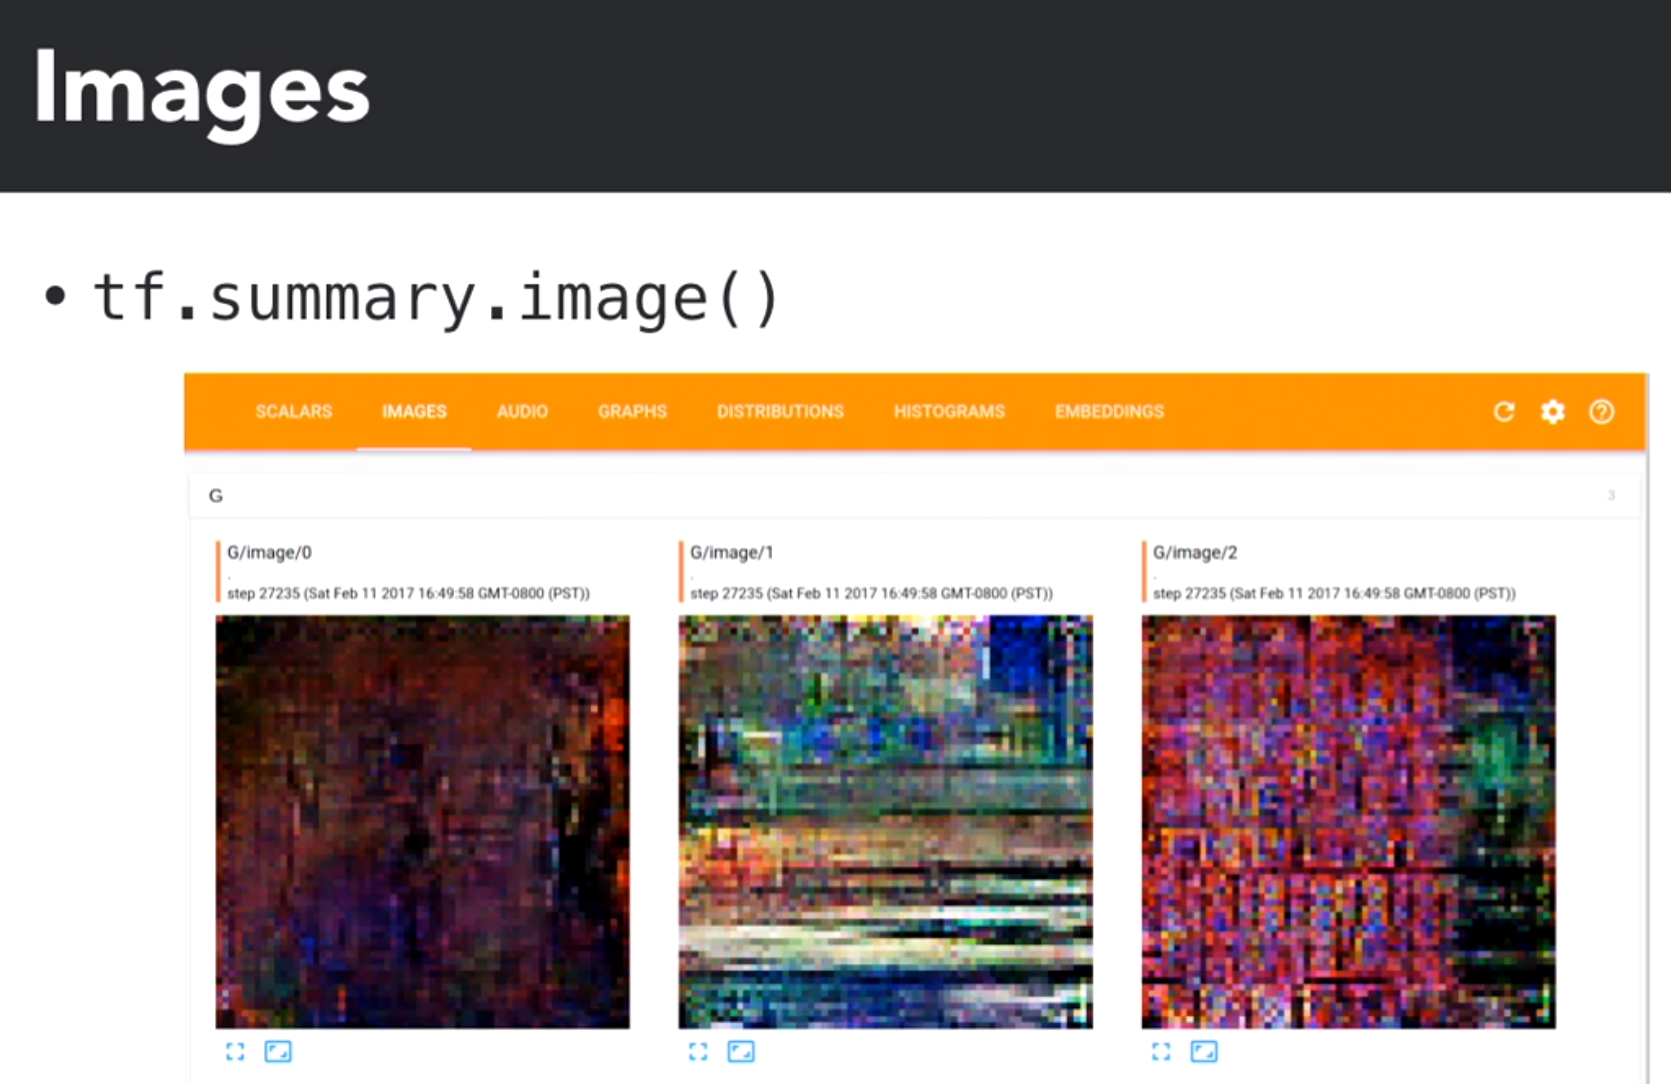

## Or Histogram: Which can be used for any type of data (so always include):
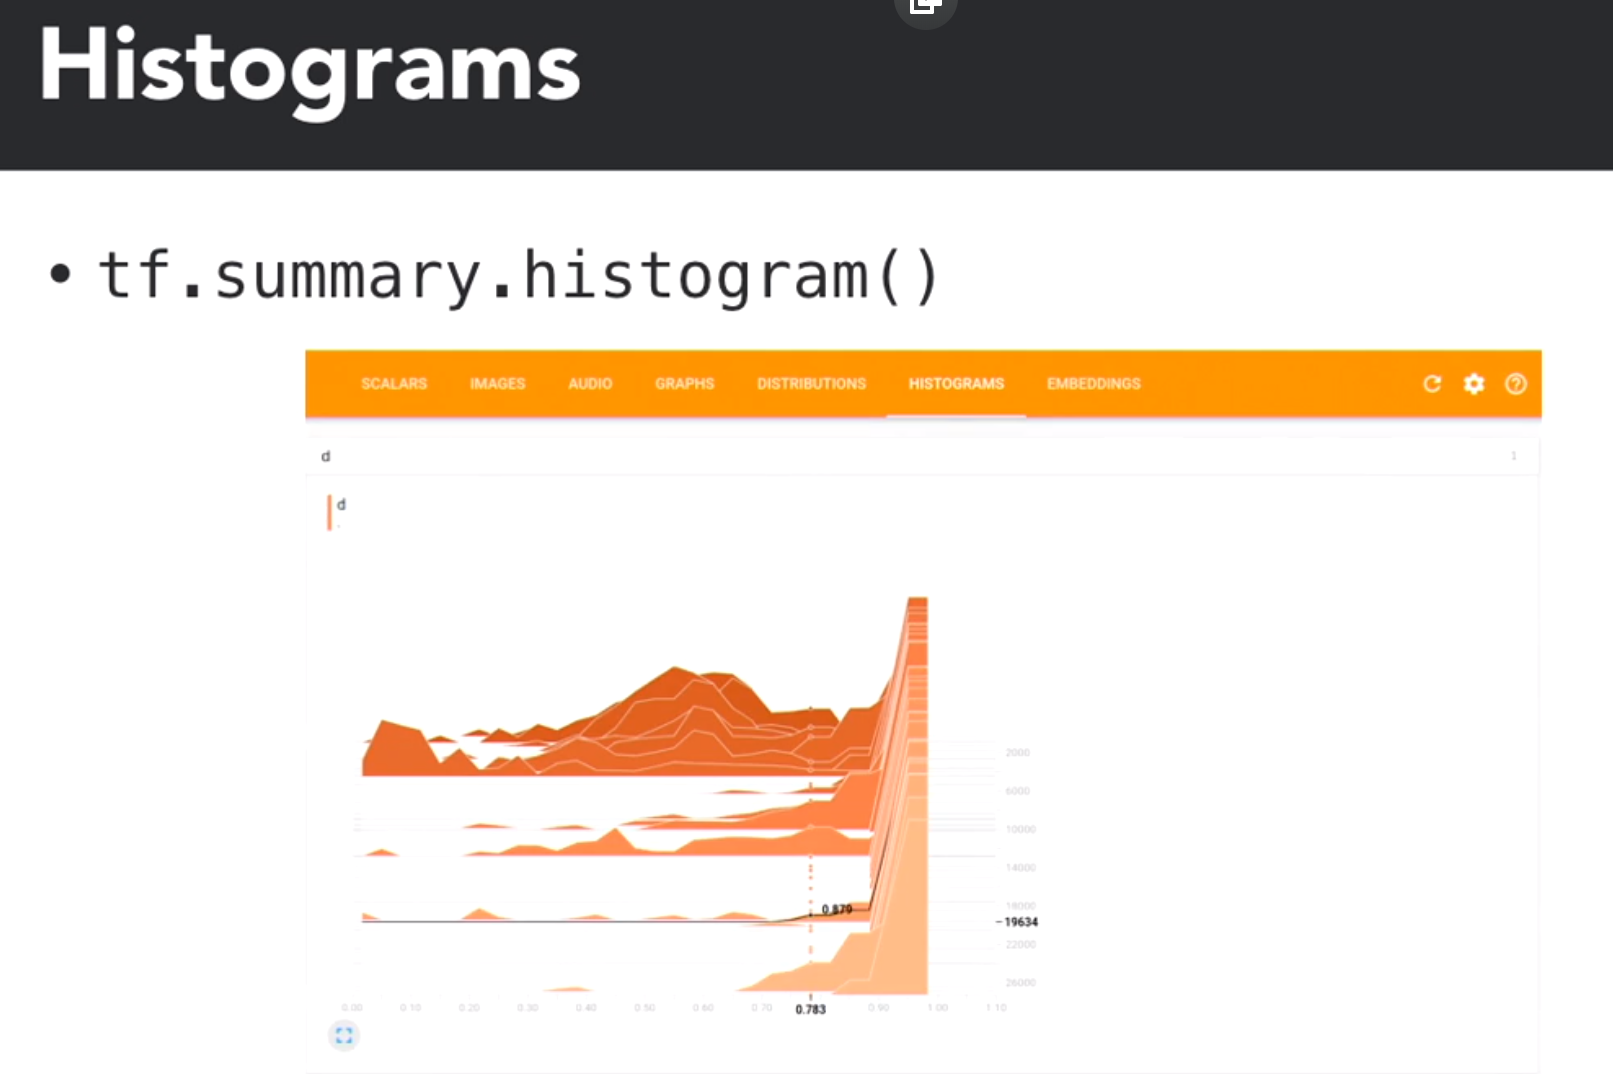

## Even Audio:
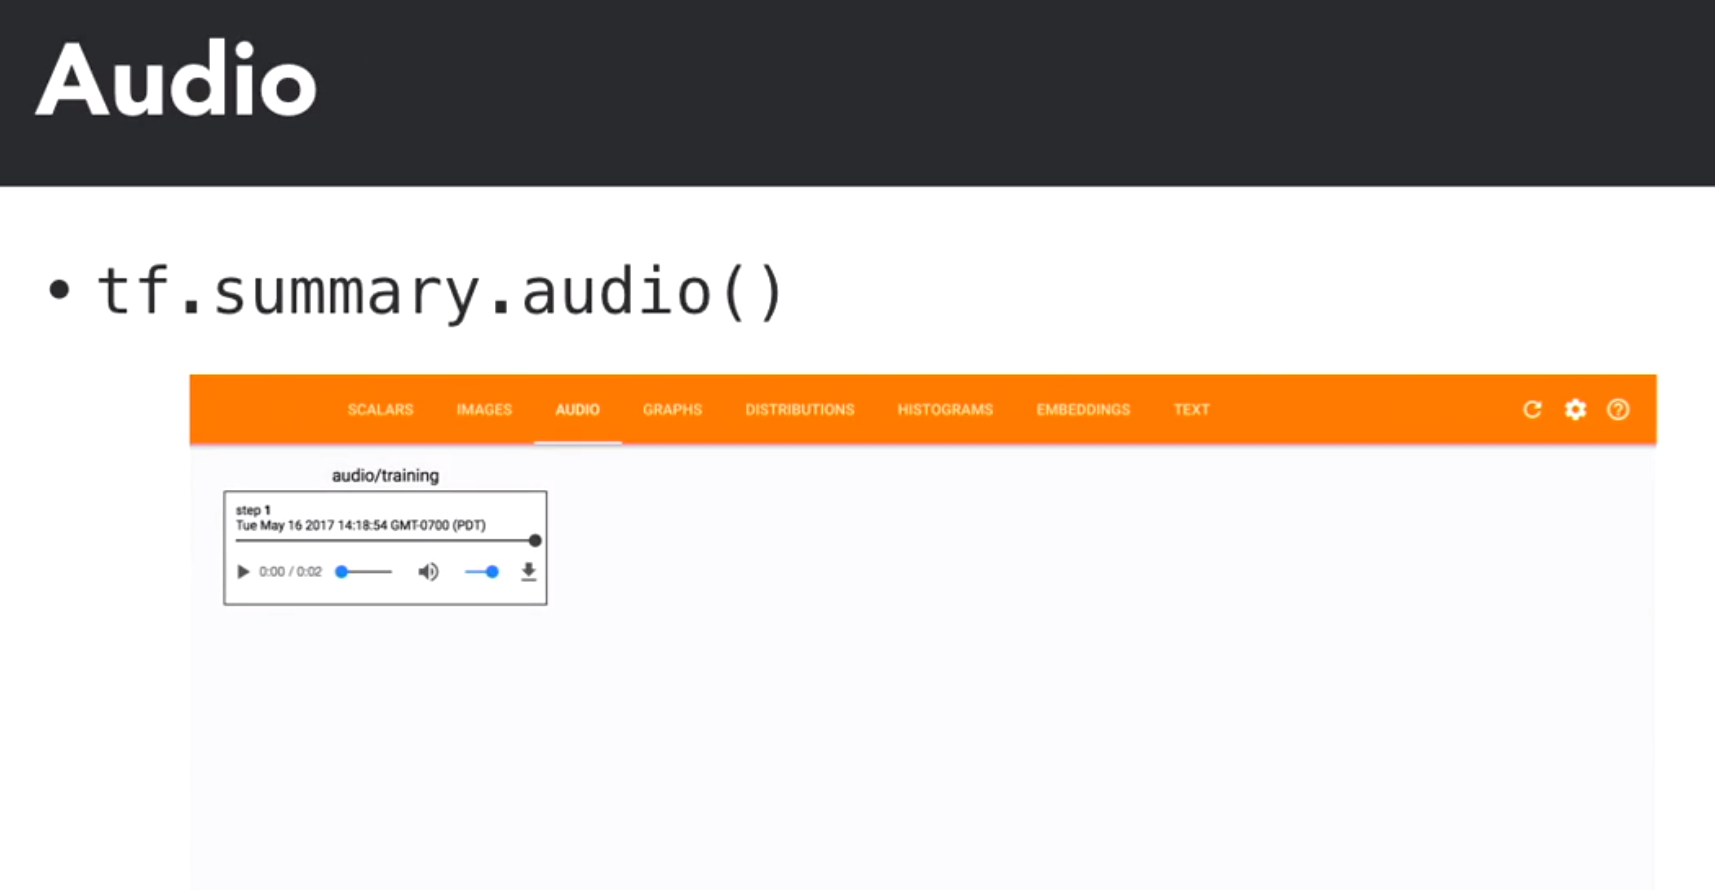